### Proof of concept.
####  [Click me I am math!](https://math.stackexchange.com/a/974358)

In [61]:
import numpy as np

def get_inverse_sigma(s, shape):
    sigma = np.zeros(shape).T
    for i in range(len(s)):
        sigma[i][i] = 1/s[i]
    return sigma

def svd_least_squares(A,b):
    u, s, vt = np.linalg.svd(A)
    sInv = get_inverse_sigma(s, A.shape)
    x = np.matmul(np.matmul(np.matmul(vt.T, sInv),u.T), b)
    return x

def apply_inverse_sigma(s, A, rows):
    res = np.array(A[:rows])
    for i, singular_value in enumerate(s):
        res[i] = res[i] / singular_value
    return res

def svd_least_squares_cheaper(A,b):
    u, s, vt = np.linalg.svd(A)
    A_cols = A.shape[1]
    # print('sInv_ut_b {}'.format(apply_inverse_sigma(s, u.T).shape))
    sInv_ut = apply_inverse_sigma(s, u.T, A_cols)
    x = np.matmul(np.matmul(vt.T, sInv_ut), b)
    return x

In [62]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [-1,1, 0],
              [0,-1, 0],
              [-1,0, 1]])

b = np.array([1, 2, 3, 1, 2, 1])


x = svd_least_squares_cheaper(A,b)



In [63]:
from numpy.linalg import solve

ne_x = solve(np.matmul(A.T, A), np.matmul(A.T, b))

ne_x - x

array([-2.22044605e-16,  2.22044605e-16,  0.00000000e+00])

In [64]:
# Verificar que el residuo es ortogonal a las columnas de la matriz A.
residuo = b - np.matmul(A, x)
np.matmul(A.T, residuo) # multiplicar al resultado por las columnas deberia dar cerca de cero


array([-6.66133815e-16,  8.88178420e-16, -2.22044605e-16])

### Analyze how many svd components should be necessary so as to find a good solution

In [195]:
import numpy as np
import pandas as pd
%matplotlib inline
import math

def least_squares_svd_k(A ,u, s, vt, k, b):
    # get svd and keep only first k components
    u = u.T[:k].T
    s = s[:k]
    vt = vt[:k]

    # find x by using svd matrices to solve least squares
    sInv_ut = np.array(u.T[:k])
    for i, singular_value in enumerate(s[:k]):
        sInv_ut[i] = sInv_ut[i] / singular_value
    x = np.matmul(np.matmul(vt.T, sInv_ut), b)
    return x



def error_per_k(A, u, s, vt, b, k):
    # mandatory: A.rows >= A.cols >= k
    x = least_squares_svd_k(A ,u, s, vt, k, b)
    # residuo deberia dar cercano a cero
    residuo = b - np.matmul(A, x)
    average_error = np.mean(np.abs(np.matmul(A.T, residuo)))
    
    if math.isnan(average_error):
        return -1 
    else:
        return average_error


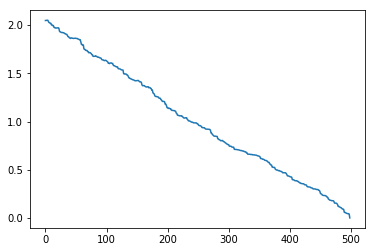

In [196]:
rows = 1000
cols = 500

# initialize matrices
A = np.random.rand(rows,cols)
b = np.random.rand(rows,1)

u, s, vt = np.linalg.svd(A)
errors_per_k = [error_per_k(A, u, s, vt, b, k) for k in range(1,cols)]

# since np.random.rand generates numbers between [0,1), 
# this error plot evidences shittyness
pd.Series(errors_per_k).plot()

### Analyze behaviour for our matrices

In [197]:
%matplotlib inline
import seaborn as sns
from matrix_file_handlers import *

A = load_cpp_matrix("D_20x20_3000_rays")
b = load_cpp_matrix("t_20x20_3000_rays")

rows, cols = A.shape
u, s, vt = np.linalg.svd(A)



In [198]:
save_matrix_to_cpp(A, "D_20x20_3000_rays")
save_matrix_to_cpp(b, "t_20x20_3000_rays")

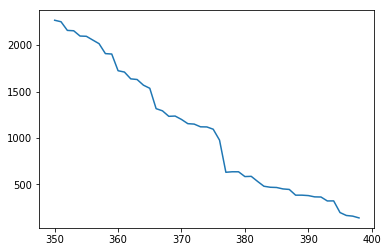

In [199]:
errors_per_k = [error_per_k(A, u, s, vt, b, k) for k in range(1,cols)]
errors_per_k= pd.Series(errors_per_k)
errors_per_k.iloc[350:].plot()

In [200]:
rows, cols = A.shape
u, s, vt = np.linalg.svd(A)
xs = [least_squares_svd_k(A ,u, s, vt, k, b) for k in range(1,cols, cols/10)]
xs = pd.Series(xs)

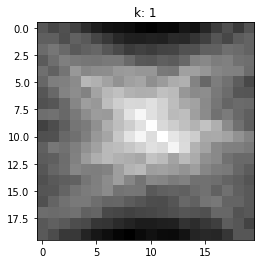

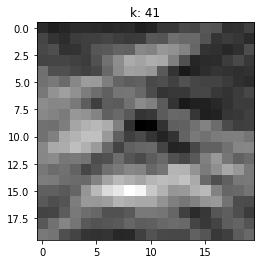

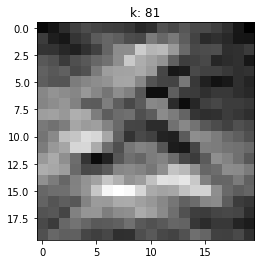

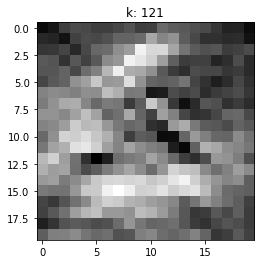

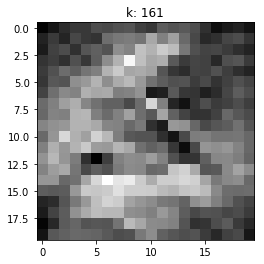

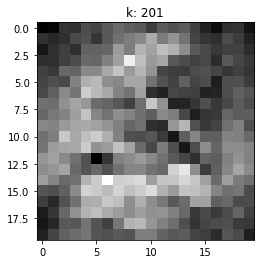

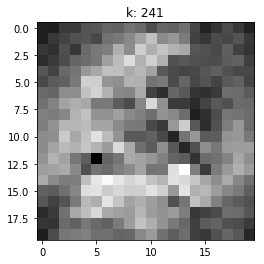

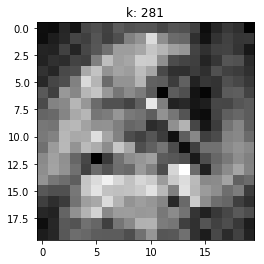

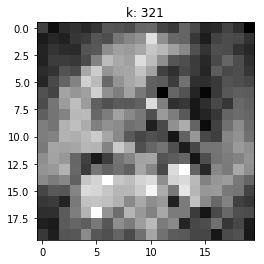

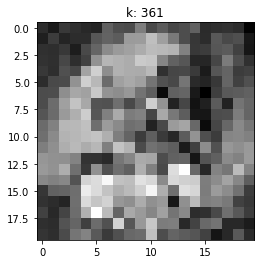

In [201]:
from matplotlib import pyplot 
for x, k in zip(xs,range(1,cols, cols/10)):
    x = x.reshape(20,20)
    pyplot.title('k: {}'.format(k))
    pyplot.imshow(x, pyplot.cm.gray)
    # pyplot.savefig('./resized_tomo{}x{}.png'.format(div,div))
    pyplot.show()